## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 3*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


5. Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).
Mostrar a través de ejemplos la imagen original y la imagen ecualizada. Mostrar también los histogramas normalizados y su distribución acumulada de ambas imágenes. Comparar los resultados de su función contra alguna función ya predefinida en Python para calcular ecualizaciones. Por ejemplo, en scikit-image, tenemos la función skimage.exposure.equalize hist; o en OpenCV, tenemos la función cv2.equalizeHist. 


    - ¿Son iguales sus resultados con los de la función? Explique por qu´e son iguales o explique por qué hay diferencias.


Referencias:

- https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
- https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
- https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71
- https://www.sciencedirect.com/science/article/pii/S1877050915014143
- https://medium.com/mlearning-ai/k-means-clustering-71a875dbce3c

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def histogram_equalization(image):
    # Paso 1: Calcular el histograma
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])

    # Paso 2: Normalizar el histograma
    hist_normalized = hist / hist.sum()

    # Paso 3: Calcular el histograma acumulado
    cum_hist = hist_normalized.cumsum()

    # Paso 4: Mapear los valores de los píxeles
    equalized_img = np.interp(image.flatten(), np.arange(256), cum_hist * 255).reshape(image.shape).astype(np.uint8)

    return equalized_img, hist_normalized, cum_hist

# Función auxiliar para mostrar imágenes e histogramas
def plot_images_and_histograms(original_img, equalized_img, original_hist, equalized_hist, original_cum_hist, equalized_cum_hist):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Mostrar imágenes
    axs[0, 0].imshow(original_img, cmap='gray')
    axs[0, 0].set_title('Imagen Original')
    axs[0, 1].imshow(equalized_img, cmap='gray')
    axs[0, 1].set_title('Imagen Ecualizada')

    # Mostrar histogramas
    axs[1, 0].plot(original_hist)
    axs[1, 0].set_title('Histograma Normalizado Original')
    axs[1, 1].plot(equalized_hist)
    axs[1, 1].set_title('Histograma Normalizado Ecualizado')

    # Mostrar histogramas acumulados
    axs[1, 2].plot(original_cum_hist)
    axs[1, 2].set_title('Histograma Acumulado Original')
    axs[0, 2].plot(equalized_cum_hist)
    axs[0, 2].set_title('Histograma Acumulado Ecualizado')

    for ax in axs.flat:
        ax.set(xlabel='Nivel de Intensidad', ylabel='Cantidad/Frecuencia')

    plt.tight_layout()
    plt.show()


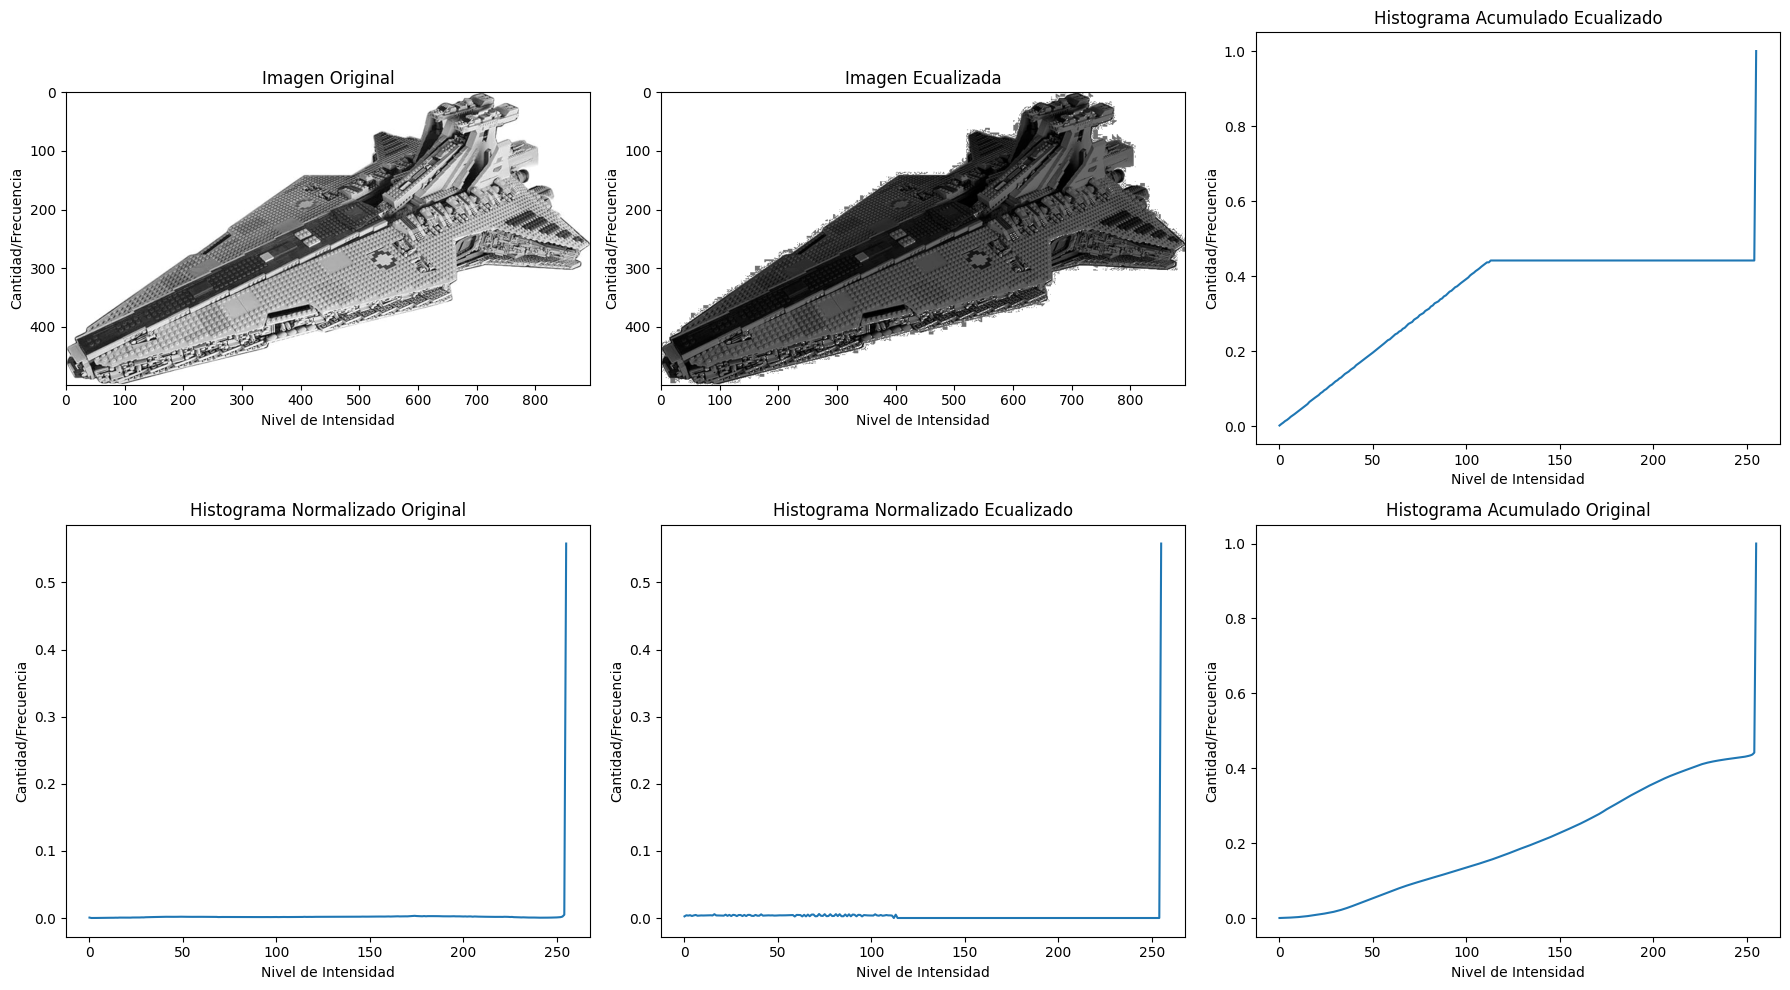

In [4]:
image = cv2.imread(cv2.samples.findFile("imgs/venator.jpg"), cv2.IMREAD_GRAYSCALE)


# Aplicar la función de ecualización de histograma
equalized_img, hist_normalized, cum_hist = histogram_equalization(image)

# Comparar con la función cv2.equalizeHist
cv2_equalized_img = cv2.equalizeHist(image)

# Mostrar los resultados
plot_images_and_histograms(image, equalized_img, hist_normalized, np.histogram(cv2_equalized_img.flatten(), 256, [0, 256])[0]/image.size, cum_hist, np.cumsum(np.histogram(cv2_equalized_img.flatten(), 256, [0, 256])[0])/image.size)

¿Son iguales sus resultados con los de la funcion? Explique por que son iguales o explique por qué hay diferencias

- **Funcionalidad Similar**:
  - Ambas ecualizaciones muestran un aumento en contraste.
  - Los histogramas acumulados de ambas ecualizaciones son casi lineales.

- **Posibles Diferencias Menores**:
  - Métodos de interpolación distintos pueden causar variaciones leves.
  - La precisión de cálculo y el redondeo difieren entre implementaciones.
  - Las optimizaciones internas de OpenCV podrían alterar ligeramente el resultado.
  - El manejo de clipping y escalado de valores de intensidad puede variar.

- **Conclusiones**:
  - Si hay diferencias, probablemente son mínimas y debidas a aspectos técnicos específicos de cada implementación.
  - Para propósitos prácticos, si los histogramas son muy similares, las implementaciones pueden considerarse equivalentes.